1. 패키지 설치

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

2. 데이터 불러오기 및 확인

In [4]:
df = pd.read_csv('./datasets/nba2021_advanced.csv')
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,10.5,19.8,15.4,6.8,1.4,3.8,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,0.0,18.2,9.4,13.4,0.0,0.0,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,16.9,18.0,17.5,10.1,1.7,2.0,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,6.8,23.2,15.4,27.9,1.4,3.2,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,3.2,14.0,8.4,11.4,0.7,2.8,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


3. 변수 선택 및 데이터 스케일 정규화

문자 : 'Player', 'Pos', 'Tm' , 명목형 변수 : 'Age' 제거 

In [5]:
df1 = df.drop(['Player', 'Pos', 'Tm', 'Age'], axis='columns')

MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1)

df_minmax = pd.DataFrame(data=df_minmax, columns=df1.columns)
df_minmax

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0.931034,0.369427,0.703518,0.399333,0.000,0.202850,0.300000,0.365989,0.550000,0.143158,0.186667,0.178404,0.161,0.450382,0.245902,0.318182,0.239437,0.836054,0.688192,0.552147,0.677419,0.146341
1,0.172414,0.013649,0.427136,0.083333,0.250,0.000000,0.000000,0.336414,0.335714,0.282105,0.000000,0.000000,0.000,0.450382,0.180328,0.045455,0.098592,0.587075,0.452030,0.245399,0.402458,0.146341
2,0.896552,0.689718,0.713568,0.394667,0.006,0.148856,0.482857,0.332717,0.625000,0.212632,0.226667,0.093897,0.201,0.274809,0.393443,0.272727,0.352113,0.841497,0.738007,0.503067,0.706605,0.219512
3,0.862069,0.792539,0.798995,0.427333,0.015,0.175853,0.194286,0.428835,0.550000,0.587368,0.186667,0.150235,0.162,0.575064,0.573770,0.636364,0.619718,0.900680,0.793358,0.687117,0.798771,0.536585
4,0.586207,0.434941,0.704774,0.361333,0.298,0.034871,0.091429,0.258780,0.300000,0.240000,0.093333,0.131455,0.064,0.516539,0.229508,0.272727,0.211268,0.818367,0.745387,0.503067,0.712750,0.219512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,0.931034,0.747043,0.722362,0.372667,0.298,0.129734,0.120000,0.256932,0.317857,0.532632,0.320000,0.079812,0.115,0.346056,0.442623,0.454545,0.436620,0.859864,0.765683,0.650307,0.766513,0.414634
493,0.758621,0.536852,0.746231,0.398000,0.104,0.063367,0.305714,0.266174,0.450000,0.530526,0.333333,0.079812,0.179,0.430025,0.377049,0.363636,0.366197,0.865986,0.754613,0.644172,0.755760,0.317073
494,0.862069,0.818016,0.801508,0.398667,0.349,0.216348,0.062857,0.179298,0.214286,0.936842,0.146667,0.032864,0.162,0.776081,0.639344,0.272727,0.549296,0.881633,0.846863,0.472393,0.789555,0.512195
495,0.482759,0.326661,0.742462,0.379333,0.133,0.090739,0.325714,0.449168,0.632143,0.320000,0.173333,0.117371,0.095,0.389313,0.327869,0.272727,0.281690,0.876871,0.747232,0.601227,0.738863,0.243902


4-1. 요인분석을 위한 적합성 검정(Barlett)

In [6]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_minmax)
chi_square_value, p_value

(20174.082695118377, 0.0)

> p-value가 0.0( p-value < 0.05) 이므로 요인분석에 적합하다는 판단.

4-2. 요인분석을 위한 적합성 검정(KMO)

In [9]:
calculate_kmo(df_minmax)

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


(array([0.84438948, 0.85906604, 0.75692645, 0.85299327, 0.71423197,
        0.7578568 , 0.43661986, 0.453323  , 0.53161727, 0.75003809,
        0.49876516, 0.65845965, 0.81669974, 0.40088942, 0.69722087,
        0.66887796, 0.73170819, 0.79737756, 0.72869593, 0.5420924 ,
        0.73924032, 0.91233572]),
 0.7017388419159649)

In [8]:
kmo_all, kmo_test = calculate_kmo(df_minmax)
kmo_test

0.7017388419159649

> 0.7은 약간 높은 수준으로 요인분석(차원축소)에 적합

5-1. 적합성 검증 후 요인의 개수 결정 : 방법 -고유치 확인

In [13]:
# 전체 요인적재값 확인
fa = FactorAnalyzer(n_factors=30, rotation=None) #객체 생성
fa.fit(df_minmax) # 요인분석 실시 

fa.get_eigenvalues()

(array([7.91186523e+00, 3.53471707e+00, 2.24783881e+00, 1.58706236e+00,
        1.45036137e+00, 1.05216046e+00, 8.55756037e-01, 6.72304539e-01,
        5.87606822e-01, 5.73673810e-01, 4.51554484e-01, 3.67980553e-01,
        2.37697861e-01, 1.74003702e-01, 1.10977496e-01, 7.96210886e-02,
        6.76824332e-02, 2.60241612e-02, 9.14449177e-03, 1.24122532e-03,
        6.81089750e-04, 4.49075760e-05]),
 array([ 7.89360746e+00,  3.46334942e+00,  2.18577112e+00,  1.53263616e+00,
         1.34065116e+00,  8.90038832e-01,  7.95957393e-01,  5.46644495e-01,
         4.75984491e-01,  3.76883201e-01,  3.15475160e-01,  2.12556566e-01,
         1.49509912e-01,  8.52146273e-02,  6.57755840e-02,  5.50188438e-02,
         3.10427282e-02,  1.47337172e-02,  2.43608481e-04, -2.00949654e-03,
        -2.49956047e-03, -2.66879618e-03]))

> array[0] = ev : 고유치(주성분의 설명력) 를 나타내는 변수. <br> array[1] = v : 고유치에 대응하는 고유벡터행렬 (고유벡터는 주성분의 방향을 의미)

In [14]:
ev, v = fa.get_eigenvalues() #고유치
np.round_(ev, 2)

array([7.91, 3.53, 2.25, 1.59, 1.45, 1.05, 0.86, 0.67, 0.59, 0.57, 0.45,
       0.37, 0.24, 0.17, 0.11, 0.08, 0.07, 0.03, 0.01, 0.  , 0.  , 0.  ])

5-2. 적합성 검증 후 요인의 개수 결정 : 방법 - Scree plot 

In [15]:
df_minmax.shape

(497, 22)

In [22]:
len(df_minmax.columns)

22

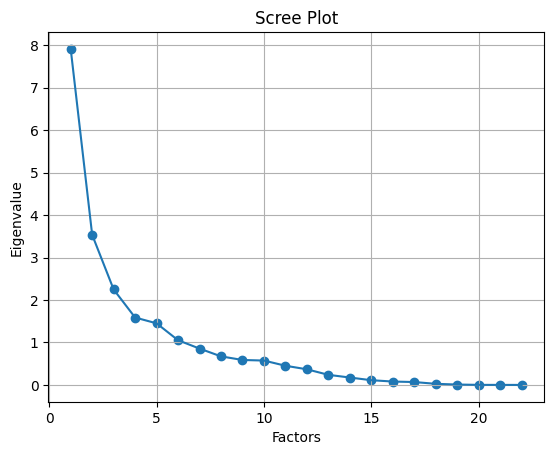

In [23]:
plt.scatter(range(1,df_minmax.shape[1]+1), ev)
plt.plot(range(1, df_minmax.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

> 4개의 요인 지점(엘보우 포인트) 이후 경사가 급격히 감소하기 때문에 4개의 요인을 선정하는 것이 적절하다 판단

6.  요인과 변수 간 요인 적재값 확인

In [24]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(df_minmax)
factor_loadings = pd.DataFrame(fa.loadings_, index=df_minmax.columns)
factor_loadings

,0,1,2,3
G,0.280363,-0.120974,0.823695,0.054468
MP,0.235239,-0.114616,0.820694,0.349032
PER,0.832268,0.305573,0.147761,0.411650
TS%,0.746473,0.103235,0.151836,0.069871
3PAr,-0.015289,-0.593922,0.004644,-0.180311
FTr,0.087057,0.356382,-0.173463,0.112161
ORB%,0.042655,0.785599,-0.047214,-0.058840
DRB%,0.105775,0.711622,0.131665,-0.009666
TRB%,0.076869,0.971609,0.092116,-0.049174
AST%,0.072484,-0.176681,0.082553,0.571263


> n_factors=4에 대한 변수간의 상관관계(요인_적재값) 확인. 상관관계는 절대값1에 가까울 수록 높은 것이기 때문에 각 요인별로 성격이 유사한 변수들을 찾아낼 수 있다. 

7. 요인과 변수 간 요인 적재값 시각화

<Axes: >

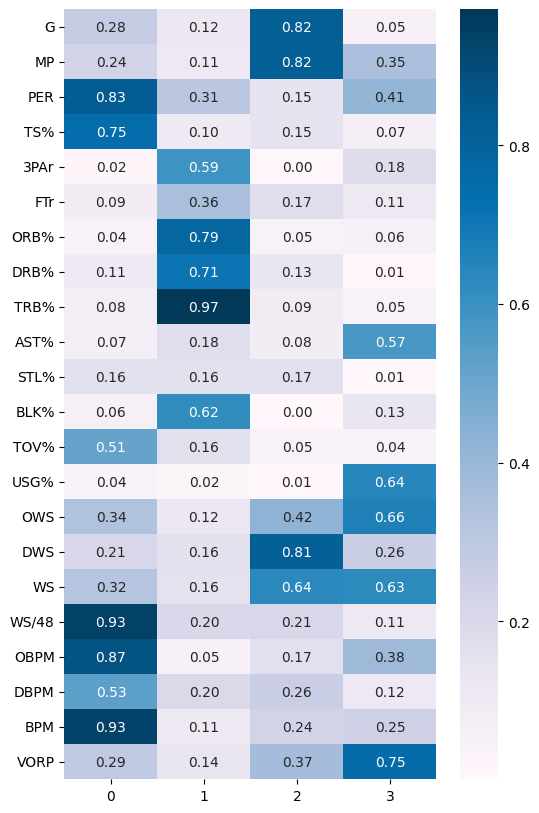

In [25]:
plt.figure(figsize=(6,10))
sb.heatmap(abs(factor_loadings), cmap='PuBu', annot=True, fmt='.2f')